![](LIS_logo.png)

In [59]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import pingouin as pg
#nlp = spacy.load('en_core_web_md')
from sklearn.decomposition import PCA
from collections import Counter

custom_style = {
    "axes.facecolor": "#343434",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "figure.facecolor": "#343434",
    "grid.color": "none",  # Remove gridlines
    "text.color": "white",
    "lines.color": "white",  # Default line color
    "lines.markeredgecolor": "white",  # Default marker edge color
    "lines.markerfacecolor": "white",  # Default marker face color
}

sns.set_style("whitegrid", rc=custom_style)


# Apply the custom style
plt.rcParams.update(custom_style)


In [5]:
norms = pd.read_excel("sensorimotor.xlsx", index_col = 0)

## Question: <i>How can we encode a model of the world when the states of the world are computationally intractable</i>?

> It seems probable ... that species possessing some remarkable characteristics, say, of shape, colour, or smell give the observer what might be called a 'right pending disproof' to postulate that these visible characteristics are the sign of equally singular but concealed properties ... This science of the concrete was necessarily restricted by its essence to results other than those destined to be acheived by the exact natural sciences but was no less scientific and its results were no less genuine. They were secured ten thousand years earlier and still remain at the basis of our own civilization. (10-11)

–– Lévi-Strauss, C. (1968). The logic of the concrete. In <i>The savage mind</i> (pp. 1-22). University of Chicago Press. 



## Word norms for two English words

![](radar_plot.png)


In [6]:
norms = norms[['auditory', 'gustatory', 'haptic', 'interoceptive', 'olfactory',
       'visual']]

/Users/james/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


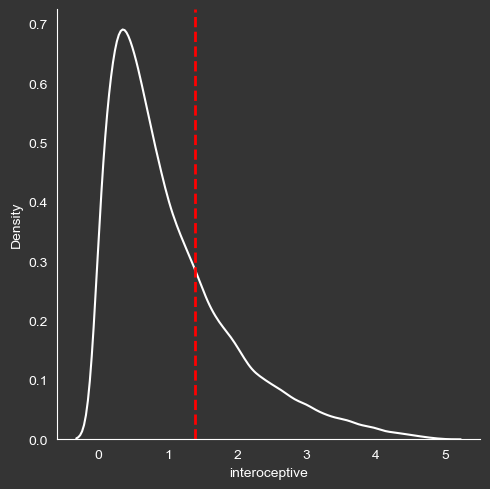

In [7]:
sns.displot(norms['interoceptive'].dropna(), color='white', kind = 'kde')
plt.axvline(x=norms['auditory'].median(), color='red', linestyle='--', linewidth=2)

<div style="background-color: #343434; color: white; padding: 10px; border-radius: 5px;">
    
## Discretizing of six sensory modalities based on median split
$$
\huge
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\times
\begin{bmatrix}
1 \\
0
\end{bmatrix} = 2^6 = \text{64 sensory states}
$$

    
</div>

In [8]:
from itertools import product

states = list(product([0, 1], repeat=6))
states = [tuple(state) for state in states]

In [ ]:
states

## 1. Encoding the world through sensory states in all English

In [10]:
english_words = pd.read_pickle('all_english_words.pkl')

In [11]:
states_ = english_words['somatic_state'].value_counts()

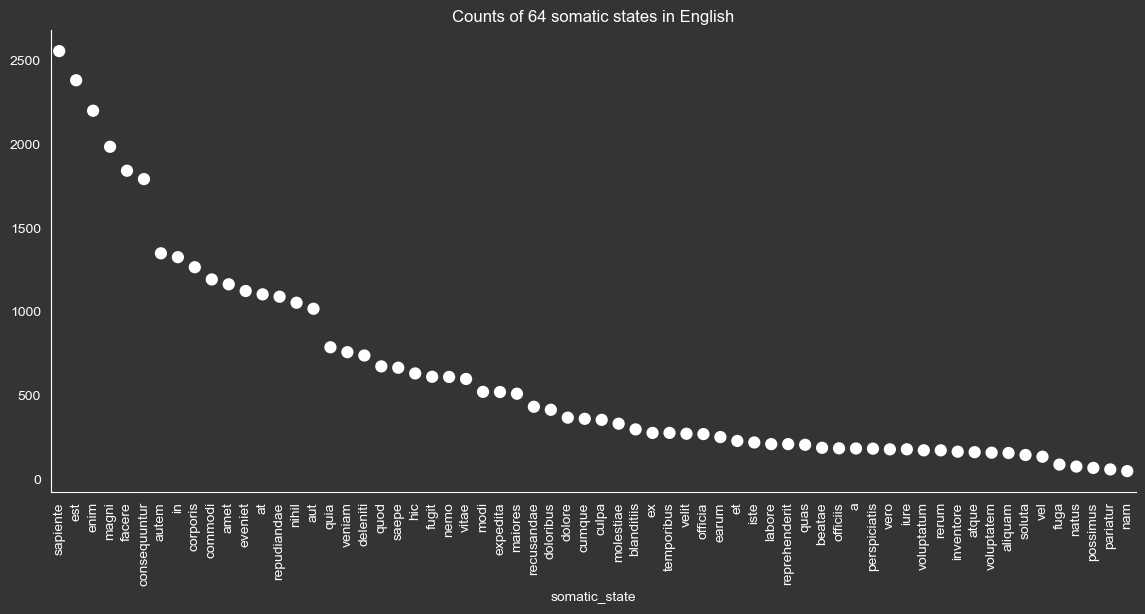

In [12]:

plt.figure(figsize=(14, 6))
ax = sns.pointplot(x=states_.index, y=states_.values, join=False, color='white')
plt.xticks(rotation=90)
plt.title("Counts of 64 somatic states in English")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
names = [i for i in states_.index]
names

In [15]:
ex = [i for i in english_words[english_words['somatic_state'] == 'ex']['word']]

In [16]:
english_words

PC1       PC2       PC3           word somatic_state   valence  \
0      2.821745  2.196924  1.837349  creme caramel       commodi       NaN   
1      3.255393  2.553648  1.949270          pasta           est  0.625031   
2      4.025985  3.035107  2.826158    pina colada       commodi       NaN   
3      3.265123  2.644766  2.397972          pizza           est  0.678299   
4      0.981955  3.324659  0.898067         sugary          amet  0.495922   
...         ...       ...       ...            ...           ...       ...   
39702  0.235201 -0.785069  0.539689         zombie         velit  0.338112   
39703 -0.412867 -0.663141 -0.713439     zoological         rerum  0.459609   
39704 -0.408404 -0.257918 -1.172600   zoologically     inventore       NaN   
39705  0.226532 -0.614268 -0.616030           zoom         earum  0.607162   
39706  0.858353 -0.468973 -1.008590      zoom lens          enim       NaN   

        arousal  dominance  imageability  semantic_size       source  
0           NaN        NaN           NaN            NaN  All English  
1      0.313147   0.602741      0.811923       0.277372  All English  
2           NaN        NaN           NaN            NaN  All English  
3      0.403975   0.608465      0.875202       0.439030  All English  
4      0.413351   0.505791      0.500193       0.341709  All English  
...         ...        ...           ...            ...          ...  
39702  0.602438   0.366321      0.817338       0.652450  All English  
39703  0.297790   0.483783      0.426528       0.579440  All English  
39704       NaN        NaN           NaN            NaN  All English  
39705  0.385508   0.587156      0.608267       0.362803  All English  
39706       NaN        NaN           NaN            NaN  All English  

[39707 rows x 11 columns]

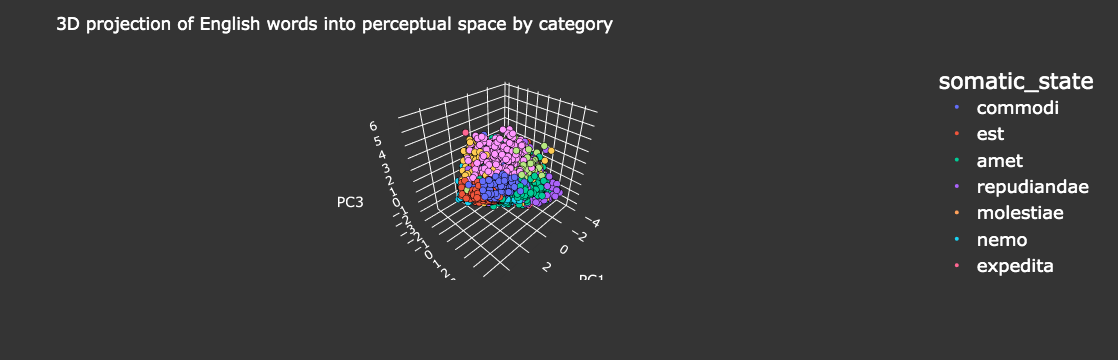

In [20]:
fig = px.scatter_3d(english_words, x='PC1', y='PC2', z='PC3',
              color='somatic_state', hover_data = ['word'])

fig.update_traces(marker=dict(size = 4, line=dict(width=0.01,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))


fig.update_layout(
    title='3D projection of English words into perceptual space by category',
    scene=dict(
        xaxis=dict(backgroundcolor="#343434"),
        yaxis=dict(backgroundcolor="#343434"),
        zaxis=dict(backgroundcolor="#343434"),
    ),
    paper_bgcolor="#343434",
    plot_bgcolor="#343434",
    font=dict(color='white'),
    legend=dict(
        font=dict(size=18, color='white')
    )
)


fig.show()
fig.write_html("/Users/james/Documents/IGEL/English_PCA.html")


[3D projection of English words into perceptual space by category](https://texturejc.github.io/IGEL/English_PCA.html)

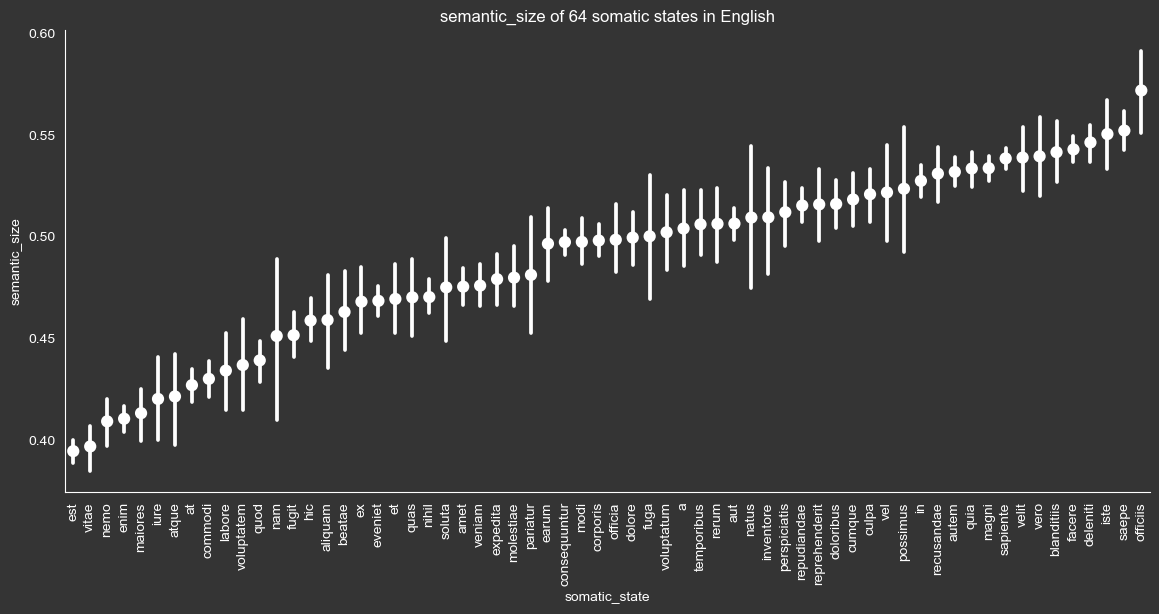

In [21]:
variable = 'semantic_size'

mean_values = english_words.groupby('somatic_state')[variable].mean()

# Sort categories by the mean value
sorted_categories = mean_values.sort_values().index

plt.figure(figsize=(14, 6))
ax = sns.pointplot(x='somatic_state', y= variable, join=False, order=sorted_categories, data = english_words, color='white')
plt.xticks(rotation=90)
plt.title(variable+" "+"of 64 somatic states in English")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [98]:
english_words

PC1       PC2       PC3           word somatic_state   valence  \
0      2.821745  2.196924  1.837349  creme caramel       commodi       NaN   
1      3.255393  2.553648  1.949270          pasta           est  0.625031   
2      4.025985  3.035107  2.826158    pina colada       commodi       NaN   
3      3.265123  2.644766  2.397972          pizza           est  0.678299   
4      0.981955  3.324659  0.898067         sugary          amet  0.495922   
...         ...       ...       ...            ...           ...       ...   
39702  0.235201 -0.785069  0.539689         zombie         velit  0.338112   
39703 -0.412867 -0.663141 -0.713439     zoological         rerum  0.459609   
39704 -0.408404 -0.257918 -1.172600   zoologically     inventore       NaN   
39705  0.226532 -0.614268 -0.616030           zoom         earum  0.607162   
39706  0.858353 -0.468973 -1.008590      zoom lens          enim       NaN   

        arousal  dominance  imageability  semantic_size       source  
0           NaN        NaN           NaN            NaN  All English  
1      0.313147   0.602741      0.811923       0.277372  All English  
2           NaN        NaN           NaN            NaN  All English  
3      0.403975   0.608465      0.875202       0.439030  All English  
4      0.413351   0.505791      0.500193       0.341709  All English  
...         ...        ...           ...            ...          ...  
39702  0.602438   0.366321      0.817338       0.652450  All English  
39703  0.297790   0.483783      0.426528       0.579440  All English  
39704       NaN        NaN           NaN            NaN  All English  
39705  0.385508   0.587156      0.608267       0.362803  All English  
39706       NaN        NaN           NaN            NaN  All English  

[39707 rows x 11 columns]

In [22]:
english_means = pd.read_pickle('all_means_english.pkl')

In [23]:
english_means

somatic_state   valence   arousal  dominance  imageability  semantic_size  \
0              a  0.486122  0.399149   0.504917      0.460433       0.503992   
1        aliquam  0.490848  0.393225   0.516901      0.571198       0.459058   
2           amet  0.502798  0.403406   0.521340      0.486723       0.475427   
3             at  0.517271  0.357877   0.526863      0.680785       0.427045   
4          atque  0.497453  0.374525   0.523732      0.565183       0.421506   
..           ...       ...       ...        ...           ...            ...   
59        veniam  0.511876  0.392957   0.515901      0.685605       0.475950   
60          vero  0.464687  0.417483   0.484937      0.422064       0.539479   
61         vitae  0.509406  0.366732   0.525102      0.624767       0.396950   
62    voluptatem  0.491121  0.371026   0.514511      0.564209       0.436935   
63    voluptatum  0.476022  0.425699   0.508660      0.507194       0.502167   

    counts  proportion       source  
0      183    0.004609  All English  
1      156    0.003929  All English  
2     1163    0.029290  All English  
3     1103    0.027778  All English  
4      161    0.004055  All English  
..     ...         ...          ...  
59     758    0.019090  All English  
60     178    0.004483  All English  
61     598    0.015060  All English  
62     158    0.003979  All English  
63     172    0.004332  All English  

[64 rows x 9 columns]

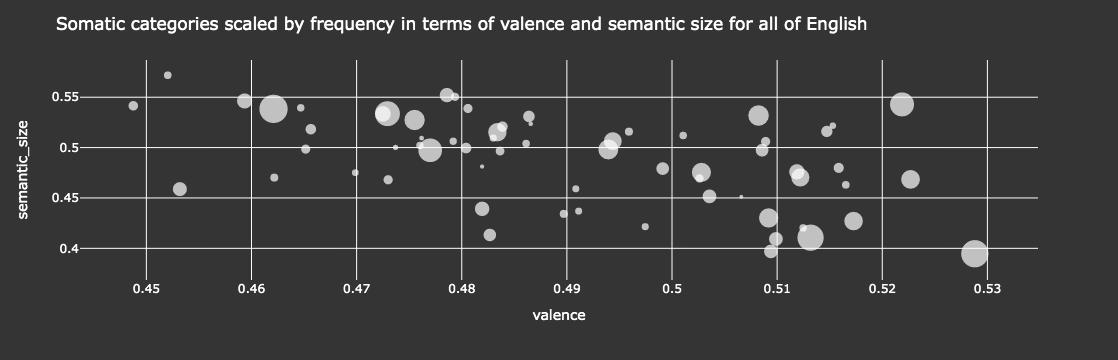

In [30]:
fig = px.scatter(english_means, x='valence', y='semantic_size', 
                 size='proportion',  
                 hover_data=['somatic_state'])

# Update marker appearance
fig.update_traces(marker=dict(color='white', line=dict(width=0.01, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Update layout for background color
fig.update_layout(
    title='Somatic categories scaled by frequency in terms of valence and semantic size for all of English',
    paper_bgcolor="#343434",  
    plot_bgcolor="#343434",   
    font=dict(color='white'), 
    xaxis=dict(showgrid=True),  
    yaxis=dict(showgrid=True)   
)

fig.show()

fig.write_html("/Users/james/Documents/IGEL/English_valence_ss.html")

## 2. The Gospels

In [44]:
gospel_words = pd.read_pickle("all_words_gospel.pkl")

/Users/james/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice



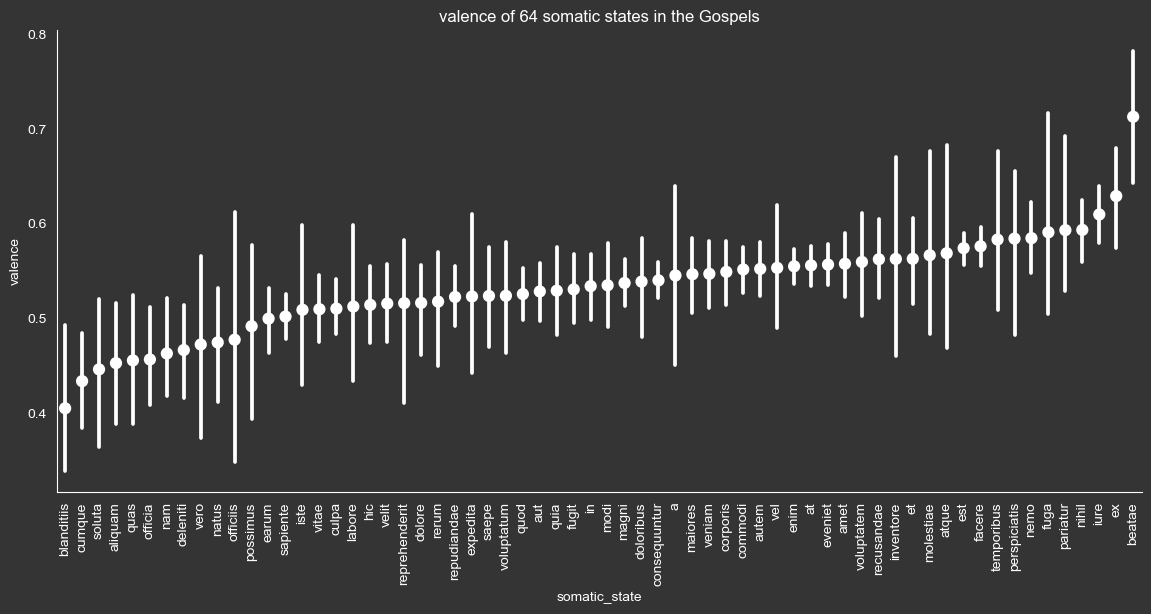

In [47]:
variable = 'valence'

mean_values = gospel_words.groupby('somatic_state')[variable].mean()

# Sort categories by the mean value
sorted_categories = mean_values.sort_values().index

plt.figure(figsize=(14, 6))
ax = sns.pointplot(x='somatic_state', y= variable, join=False, order=sorted_categories, data = gospel_words, color='white')
plt.xticks(rotation=90)
plt.title(variable+" "+"of 64 somatic states in the Gospels")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [48]:
gospel_means = pd.read_pickle("/Users/james/Documents/IGEL/all_data_means_gospel.pkl")

In [50]:
gospel_means = gospel_means[gospel_means['source'] == 'Gospels'].reset_index(drop = True)

In [52]:
all_means = pd.concat([english_means, gospel_means]).reset_index(drop = True)

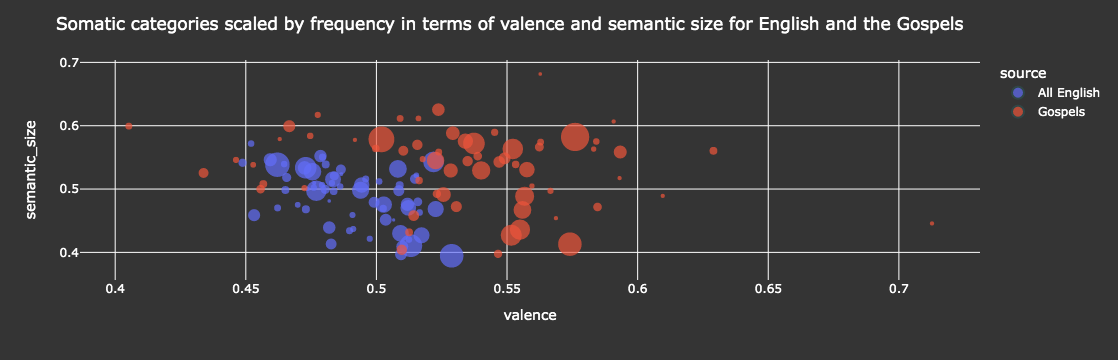

In [57]:
fig = px.scatter(all_means, x='valence', y='semantic_size', 
                 size='proportion',  
                 color='source',     
                 hover_data=['somatic_state'])

# Update marker appearance
fig.update_traces(marker=dict(line=dict(width=0.01, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Update layout for background color
fig.update_layout(
    title='Somatic categories scaled by frequency in terms of valence and semantic size for English and the Gospels',
    paper_bgcolor="#343434",  
    plot_bgcolor="#343434",  
    font=dict(color='white'), 
    xaxis=dict(showgrid=True),  
    yaxis=dict(showgrid=True)   
)

# Show the plot
fig.show()

#fig.write_html("/Users/james/Documents/IGEL/English_gospel_valence_ss.html")

In [85]:
all_words = pd.read_pickle("all_words.pkl")

In [88]:
aov = pg.anova(dv='valence', between=['somatic_state','source'], data=all_words,
               detailed=True)

In [89]:
aov

Source          SS       DF        MS           F  \
0           somatic_state   14.854775     63.0  0.235790   19.833356   
1                  source    3.075189      1.0  3.075189  258.667876   
2  somatic_state * source    0.550623     63.0  0.008740    0.735164   
3                Residual  358.083479  30120.0  0.011889         NaN   

           p-unc       np2  
0  5.619711e-215  0.039832  
1   5.841962e-58  0.008515  
2   9.429997e-01  0.001535  
3            NaN       NaN